<a href="https://colab.research.google.com/github/ak1feb3/Hybrid-CNN-LSTM/blob/main/WEEKEND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HYBRID CNN-LSTM FOR FORECASTING STOCK PRICES

IMPORT LIBRARIES

In [ ]:
import numpy as np                             
import pandas as pd                            
from keras.models import Sequential            
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt                
from numpy import array

IMPORT DATASET

In [ ]:
from google.colab import files
DataSet=files.upload()

Saving TSLA.csv to TSLA (1).csv


READ DATASET

In [ ]:
df=pd.read_csv('TSLA.csv') 

CHOOSING CLOSE COLUMN

In [ ]:
close=df.reset_index()['Close']               #CHOOSING REQUIERD COLUMN

In [ ]:
dataset = df["Close"]
dataset = pd.DataFrame(dataset)
data = dataset.values
data.shape

(2416, 1)

DATA PREPROCESSING

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(close).reshape(-1,1))

SPLITTING DATA INTO TRAIN AND TEST 75&&25

In [ ]:
train_size=int(len(data)*0.75)
test_size=len(data)-train_size

In [ ]:
train_data = data[ :train_size , 0:1 ]
test_data = data[ train_size-60: , 0:1 ]

In [ ]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
x_train.shape , y_train.shape

((1752, 60, 1), (1752,))

CNN-LSTM MODEL

In [ ]:
model = Sequential()

# CNN LAYER
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

# LSTM LAYER
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# OUTPUT LAYER
model.add(Dense(units=1))

# MODEL COMEPILETION
model.compile(optimizer='adam', loss='mean_squared_error')

# FITTING MODEL
model.fit(x_train, y_train, epochs=50, batch_size=50, verbose=2)



Epoch 1/50
36/36 - 6s - loss: 0.0067 - 6s/epoch - 167ms/step
Epoch 2/50
36/36 - 0s - loss: 0.0015 - 303ms/epoch - 8ms/step
Epoch 3/50
36/36 - 0s - loss: 0.0013 - 306ms/epoch - 8ms/step
Epoch 4/50
36/36 - 0s - loss: 0.0013 - 305ms/epoch - 8ms/step
Epoch 5/50
36/36 - 0s - loss: 0.0013 - 304ms/epoch - 8ms/step
Epoch 6/50
36/36 - 0s - loss: 0.0011 - 296ms/epoch - 8ms/step
Epoch 7/50
36/36 - 0s - loss: 0.0011 - 306ms/epoch - 8ms/step
Epoch 8/50
36/36 - 0s - loss: 0.0012 - 304ms/epoch - 8ms/step
Epoch 9/50
36/36 - 0s - loss: 0.0011 - 303ms/epoch - 8ms/step
Epoch 10/50
36/36 - 0s - loss: 0.0010 - 303ms/epoch - 8ms/step
Epoch 11/50
36/36 - 0s - loss: 0.0010 - 359ms/epoch - 10ms/step
Epoch 12/50
36/36 - 0s - loss: 0.0012 - 433ms/epoch - 12ms/step
Epoch 13/50
36/36 - 0s - loss: 8.8113e-04 - 440ms/epoch - 12ms/step
Epoch 14/50
36/36 - 0s - loss: 9.2568e-04 - 409ms/epoch - 11ms/step
Epoch 15/50
36/36 - 0s - loss: 8.9426e-04 - 406ms/epoch - 11ms/step
Epoch 16/50
36/36 - 0s - loss: 7.5299e-04 - 359m

AFTER MODEL FIITING , TEST MODEL WITH TEST DATA

In [ ]:
x_test = []
y_test = []

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape , y_test.shape

((604, 60, 1), (604,))

In [ ]:
predictions = model.predict(x_test)

19/19 [==============================] - 1s 4ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(604, 1)

In [ ]:
y_test = scaler.inverse_transform([y_test])

AFTER TESTING CHECK THE DIFFERENCE BETWEEN ACTUAL AND PREDICTED RESULT

In [ ]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)


In [ ]:
RMSE

0.6

In [ ]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions


PLOT THE RESULTS OF TESTING

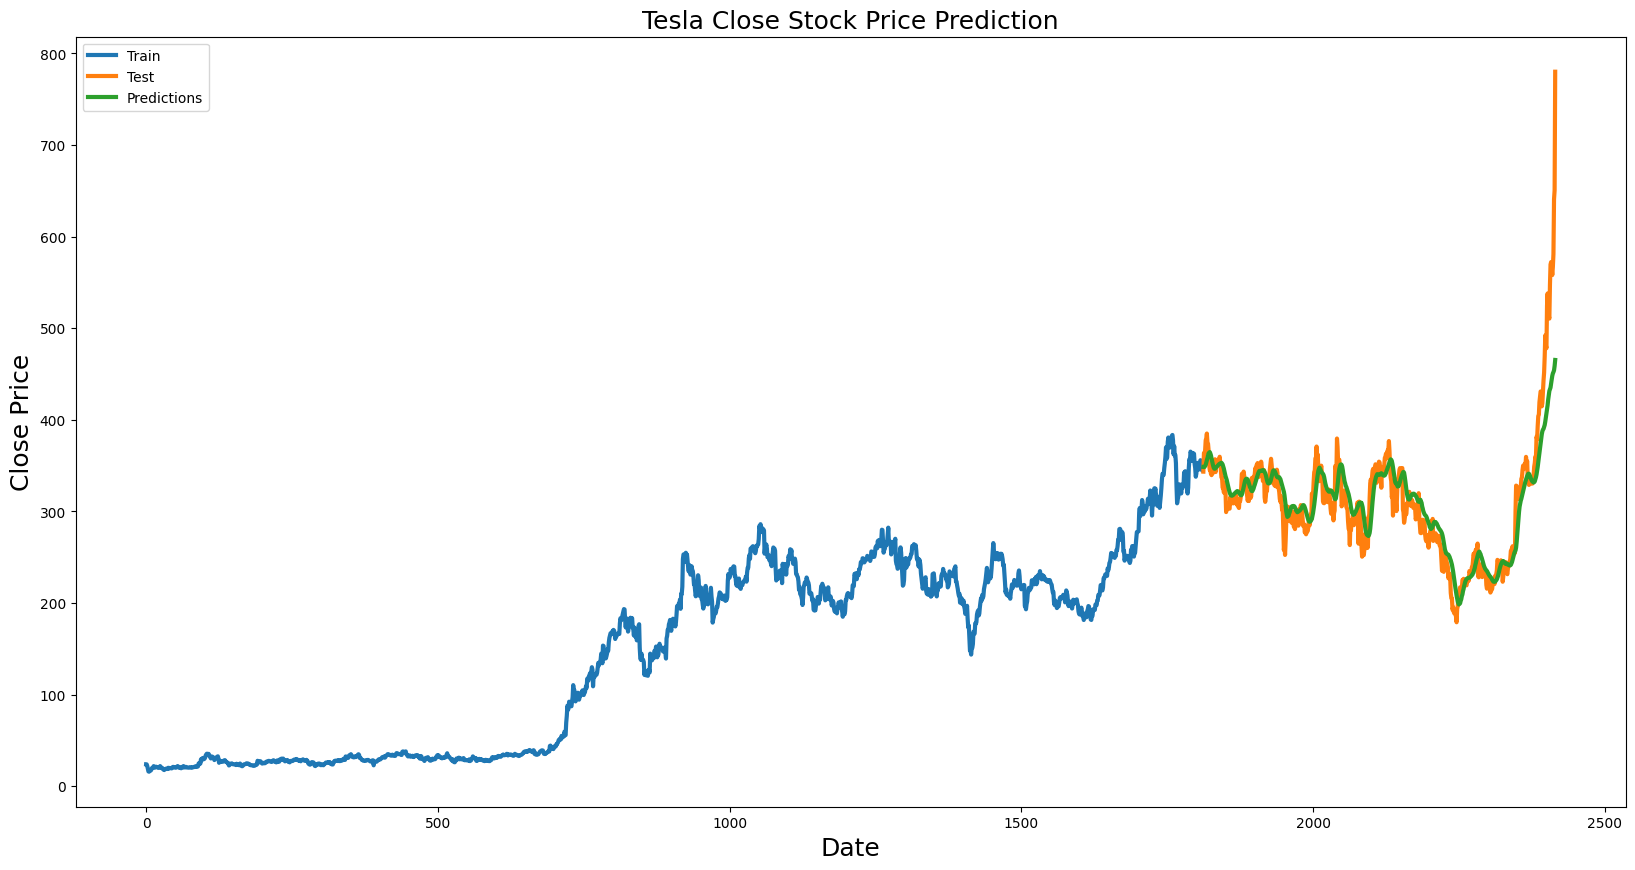

In [ ]:
plt.figure(figsize= (20, 10))
plt.title('Tesla Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

PREDICTION OF NEXT 30 DAYS USING THE MODEL

In [ ]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [ ]:
from datetime import timedelta

In [ ]:
future = 30
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i))

1/1 [==============================] - 0s 29ms/step
[0.58819973]
1/1 [==============================] - 0s 29ms/step
[0.58819973, 0.5920378]
1/1 [==============================] - 0s 29ms/step
[0.58819973, 0.5920378, 0.59024084]
1/1 [==============================] - 0s 29ms/step
[0.58819973, 0.5920378, 0.59024084, 0.5765282]
1/1 [==============================] - 0s 29ms/step
[0.58819973, 0.5920378, 0.59024084, 0.5765282, 0.5664289]
1/1 [==============================] - 0s 30ms/step
[0.58819973, 0.5920378, 0.59024084, 0.5765282, 0.5664289, 0.55467343]
1/1 [==============================] - 0s 30ms/step
[0.58819973, 0.5920378, 0.59024084, 0.5765282, 0.5664289, 0.55467343, 0.5461111]
1/1 [==============================] - 0s 29ms/step
[0.58819973, 0.5920378, 0.59024084, 0.5765282, 0.5664289, 0.55467343, 0.5461111, 0.53690135]
1/1 [==============================] - 0s 30ms/step
[0.58819973, 0.5920378, 0.59024084, 0.5765282, 0.5664289, 0.55467343, 0.5461111, 0.53690135, 0.5299649]
1/1 [=

In [ ]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output)

In [ ]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "DATE", "CLOSE"
df_result

,DATE,CLOSE
0,1970-01-01 00:00:00.000002415,465.302246
1,1970-01-02 00:00:00.000002415,468.235291
2,1970-01-03 00:00:00.000002415,466.862061
3,1970-01-04 00:00:00.000002415,456.382874
4,1970-01-05 00:00:00.000002415,448.664978
5,1970-01-06 00:00:00.000002415,439.681458
6,1970-01-07 00:00:00.000002415,433.138123
7,1970-01-08 00:00:00.000002415,426.100037
8,1970-01-09 00:00:00.000002415,420.799225
9,1970-01-10 00:00:00.000002415,415.794739


PLOT THE PREDICTED RESULT 

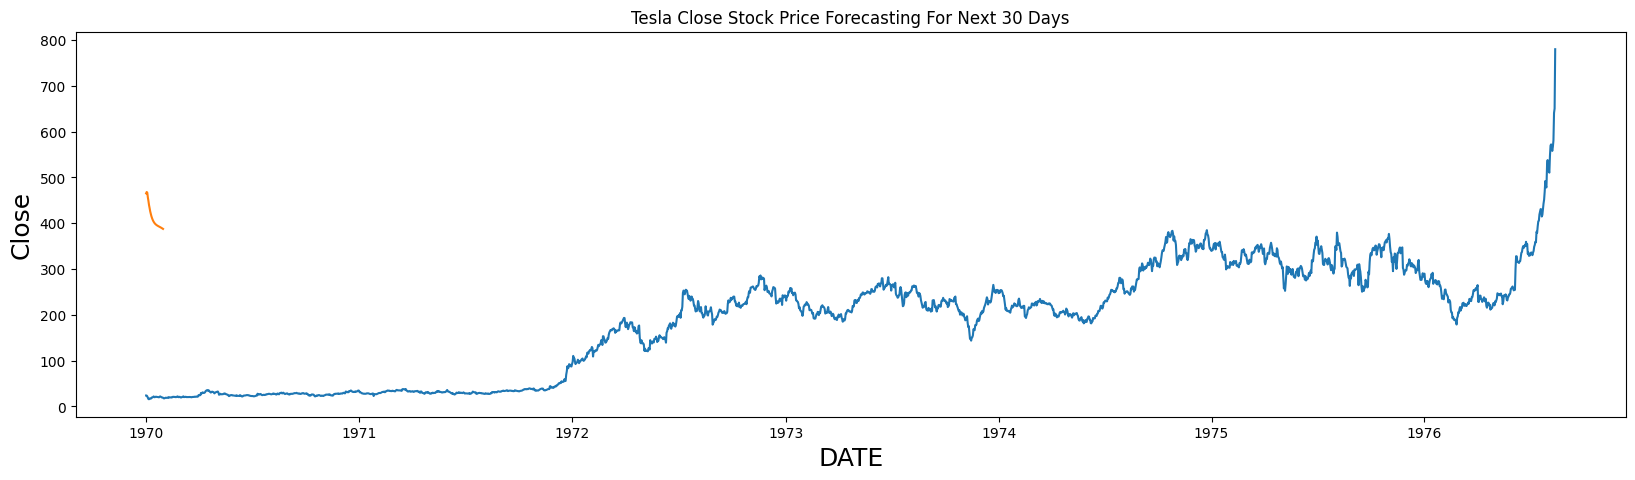

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Tesla Close Stock Price Forecasting For Next 30 Days')
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Close' ,fontsize=18)
plt.plot(df['Close'])
plt.plot(df_result.set_index('DATE')[['CLOSE']])